# Regresi Polinomial

#### Salsabila Zahra Putri (19/440240/TK/48567)

Regresi Polinomial merupakan suatu fungsi yang diterapkan untuk melihat hubungan variabel independen dan dependen secara non-linear. Berikut adalah langkah-langkah penerapan regresi polinomial menggunakan Python

#### Input Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

#### Input Dataset

In [208]:
dataset=pd.read_csv('day.csv')
dataset.describe()

#### temp = (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39
#### Maka nilai suhu (dalam Celcius) adalah suhu x 47 - 8

In [529]:
X = dataset.iloc[:, [9, 14]].values
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

#### Polynomial Regression Code

In [72]:
class regresipolinomial() :
    
    def __init__(self, degree, learning_rate, iterasi) :
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterasi = iterasi
    
    # transformasi matrix X
    def transform(self, X) :
        
        # matriks X_transform
        X_transform = np.ones((self.m, 1))
        j = 0
        
        for j in range(self.degree + 1) :
            if j != 0 :
                x_pow = np.power(X, j)
                X_transform = np.append(X_transform, x_pow.reshape( -1, 1 ), axis = 1)
        return X_transform

    # normalisasi matriks X
    def normalize( self, X ) :
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X
    
    # model training
    def fit(self, X, Y) :
        self.X = X
        self.Y = Y
        self.m = len(X)
        self.n = 1
        
        # fungsi koefisien/weight
        self.W = np.zeros(self.degree + 1)
        
        # mengubah matriks X agar memenuhi h(x) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform(self.X)
        
        # normalisasi matriks X_transform
        X_normalize = self.normalize(X_transform)
        
        # metode optimisasi gradient descent
        for i in range(self.iterasi) :
            h = self.predict(self.X)
            error = h-self.Y
            
            # update nilai koefisien/weights
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self
    
    # prediksi
    def predict(self, X) :
        
        # mengubah matriks X agar memenuhi h(x) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform )
       
        return np.dot( X_transform, self.W )
    
    # menghitung cost function
    def cost(self, y, g): 
        return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

#### Main Code

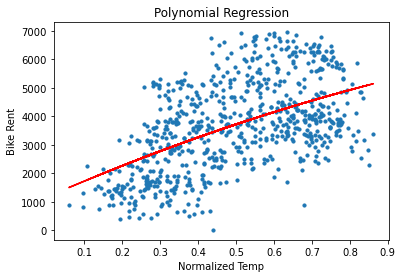

Error: 0.70


In [96]:
def main() :
    
    # dataset
    dataset=pd.read_csv('day.csv')
    data = dataset.iloc[:, 9].values
    X = []
    
    for i in range (len(data)):
        a = [data[i]]
        X.append(a)

    Y = dataset.iloc[:, 14].values

    # model training
    model = regresipolinomial( degree = 2, learning_rate = 0.01, iterasi = 2000 )
    model.fit( X, Y )
    
    # nilai prediksi untuk variabel independen
    Y_pred = model.predict( X )
    
    # Plotting
    plt.scatter( X, Y, s=10 )
    plt.plot( X, Y_pred, color = 'red' )
    plt.title( 'Polynomial Regression' )
    plt.xlabel( 'Normalized Temp' )
    plt.ylabel( 'Bike Rent' )
    plt.show()
    r = regresipolinomial(2, 0.01, 2000)
    print('Error: {:.2f}'.format(r.cost(Y, Y_pred)))

if __name__ == "__main__" :
    main()

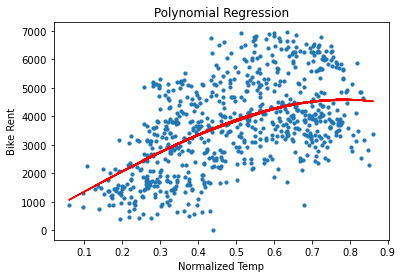

Error: 0.66
Prediksi jumlah sepeda yang dipesan saat suhu 39 derajat Celcius adalah 2183.4904729483937


In [100]:
# Driver code
def main() :
    
    # Create dataset
    dataset=pd.read_csv('day.csv')
    data = dataset.iloc[:, 9].values
    X = []
    
    for i in range (len(data)):
        a = [data[i]]
        X.append(a)

    Y = dataset.iloc[:, 14].values

    # model training
    model = regresipolinomial( degree = 3, learning_rate = 0.01, iterasi = 2000 )
    model.fit( X, Y )
    
    # nilai prediksi untuk variabel independen
    Y_pred = model.predict( X )
    
    # Plotting
    plt.scatter( X, Y, s=10 )
    plt.plot( X, Y_pred, color = 'red' )
    plt.title( 'Polynomial Regression' )
    plt.xlabel( 'Normalized Temp' )
    plt.ylabel( 'Bike Rent' )
    plt.show()
    
    # nilai cost function
    r = regresipolinomial(3, 0.01, 2000)
    print('Error: {:.2f}'.format(r.cost(Y, Y_pred)))
    
    # Prediction Point
    x = np.reshape(X, len(X))
    suhu = 1
    bike_rent = np.interp(suhu, x, Y_pred)
    print(f'Prediksi jumlah sepeda yang dipesan saat suhu {suhu*47-8} derajat Celcius adalah {bike_rent}')

if __name__ == "__main__" :
    main()